# Drug Consumption: Mais Testes com Classificadores

In [189]:
import pandas as pd
import utils as ut

from importlib import reload
reload(ut)

<module 'utils' from '/home/ngmonteiro/llm_experiments/ufes/2024-1-P1-Drug-Consumption/utils.py'>

In [190]:
data = pd.read_csv('data/drug_consumption_preprocessed.csv', index_col="ID")
pd.set_option('display.max_columns', None)

# Executa as filtragens feitas no notebook "classification.ipynb"
X, y = ut.build_dataset(data)

# Coloque "True" se quiser rodar os experimentos ao invés de carregar resultados anteriores.
run = True

# Observações e Mini-Experimentos

### Análise somente com métricas de personalidade
Tentamos descobrir as relações entre as métricas e as substâncias, de forma que outras características sejam ocultas.

In [191]:
t = 2

def metrics_run():
    x_ = X[ut.numCols]
    labels = y.applymap(ut.threshold, t=[t])
    return ut.test_classifiers(x_, labels)

results_metrics, cm_metrics = ut.run_or_load("results/metrics_{a}.csv", metrics_run if run else None)

/home/ngmonteiro/llm_experiments/ufes/2024-1-P1-Drug-Consumption/utils.py:316: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  for i, j in enumerate(t):


Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.500000  0.000000  0.644111  0.031143  0.500000   
GaussianNB              0.500000  0.000000  0.659310  0.035670  0.501326   
KNeighborsClassifier    0.498711  0.002144  0.627670  0.034886  0.516411   
NearestCentroid         0.610756  0.107277  0.684032  0.031788  0.596212   
RandomForestClassifier  0.500000  0.000000  0.629211  0.034224  0.507965   

Substância                          Benzos                Caff            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.000000  0.650322  0.036123  0.500000  0.000000   
GaussianNB              0.021324  0.651347  0.027023  0.500000  0.000000   
KNeighborsClassifier    0.022776  0.620744  0.036977  0.500000  0.000000   
NearestCentroid         0.045859  0.674581  0.029062  0.651812  0.127268   
RandomForestClassifier  0.013920  0.633772  0.030072  0.500000  0.000000   

Substância              Cannabis                Choc                Coke  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.698227  0.033018  0.500000  0.000000  0.633586   
GaussianNB              0.718964  0.024678  0.500000  0.000000  0.643607   
KNeighborsClassifier    0.678360  0.036074  0.499909  0.000496  0.600095   
NearestCentroid         0.722610  0.030059  0.432776  0.135944  0.666130   
RandomForestClassifier  0.698650  0.035595  0.499909  0.000496  0.616858   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.045793  0.499702  0.001630  0.679548  0.029399   
GaussianNB              0.037374  0.531724  0.039039  0.692051  0.031745   
KNeighborsClassifier    0.034801  0.502397  0.014536  0.655628  0.023758   
NearestCentroid         0.037382  0.655695  0.057189  0.703322  0.035331   
RandomForestClassifier  0.026043  0.500805  0.009081  0.672064  0.028229   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.566223  0.042925  0.574273  0.040267  0.644590   
GaussianNB              0.596244  0.044658  0.574212  0.043002  0.683517   
KNeighborsClassifier    0.526155  0.028457  0.546415  0.027890  0.627694   
NearestCentroid         0.696436  0.050783  0.649028  0.041564  0.704672   
RandomForestClassifier  0.514138  0.020811  0.514499  0.015602  0.653451   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.035819  0.702829  0.035409  0.604144  0.024166   
GaussianNB              0.038823  0.714535  0.036632  0.618866  0.036632   
KNeighborsClassifier    0.035979  0.669091  0.032633  0.561403  0.038468   
NearestCentroid         0.029405  0.714894  0.030625  0.677730  0.041558   
RandomForestClassifier  0.030241  0.694756  0.034742  0.551499  0.023386   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.668046  0.035731  0.635961  0.033096  0.544899   
GaussianNB              0.685507  0.032888

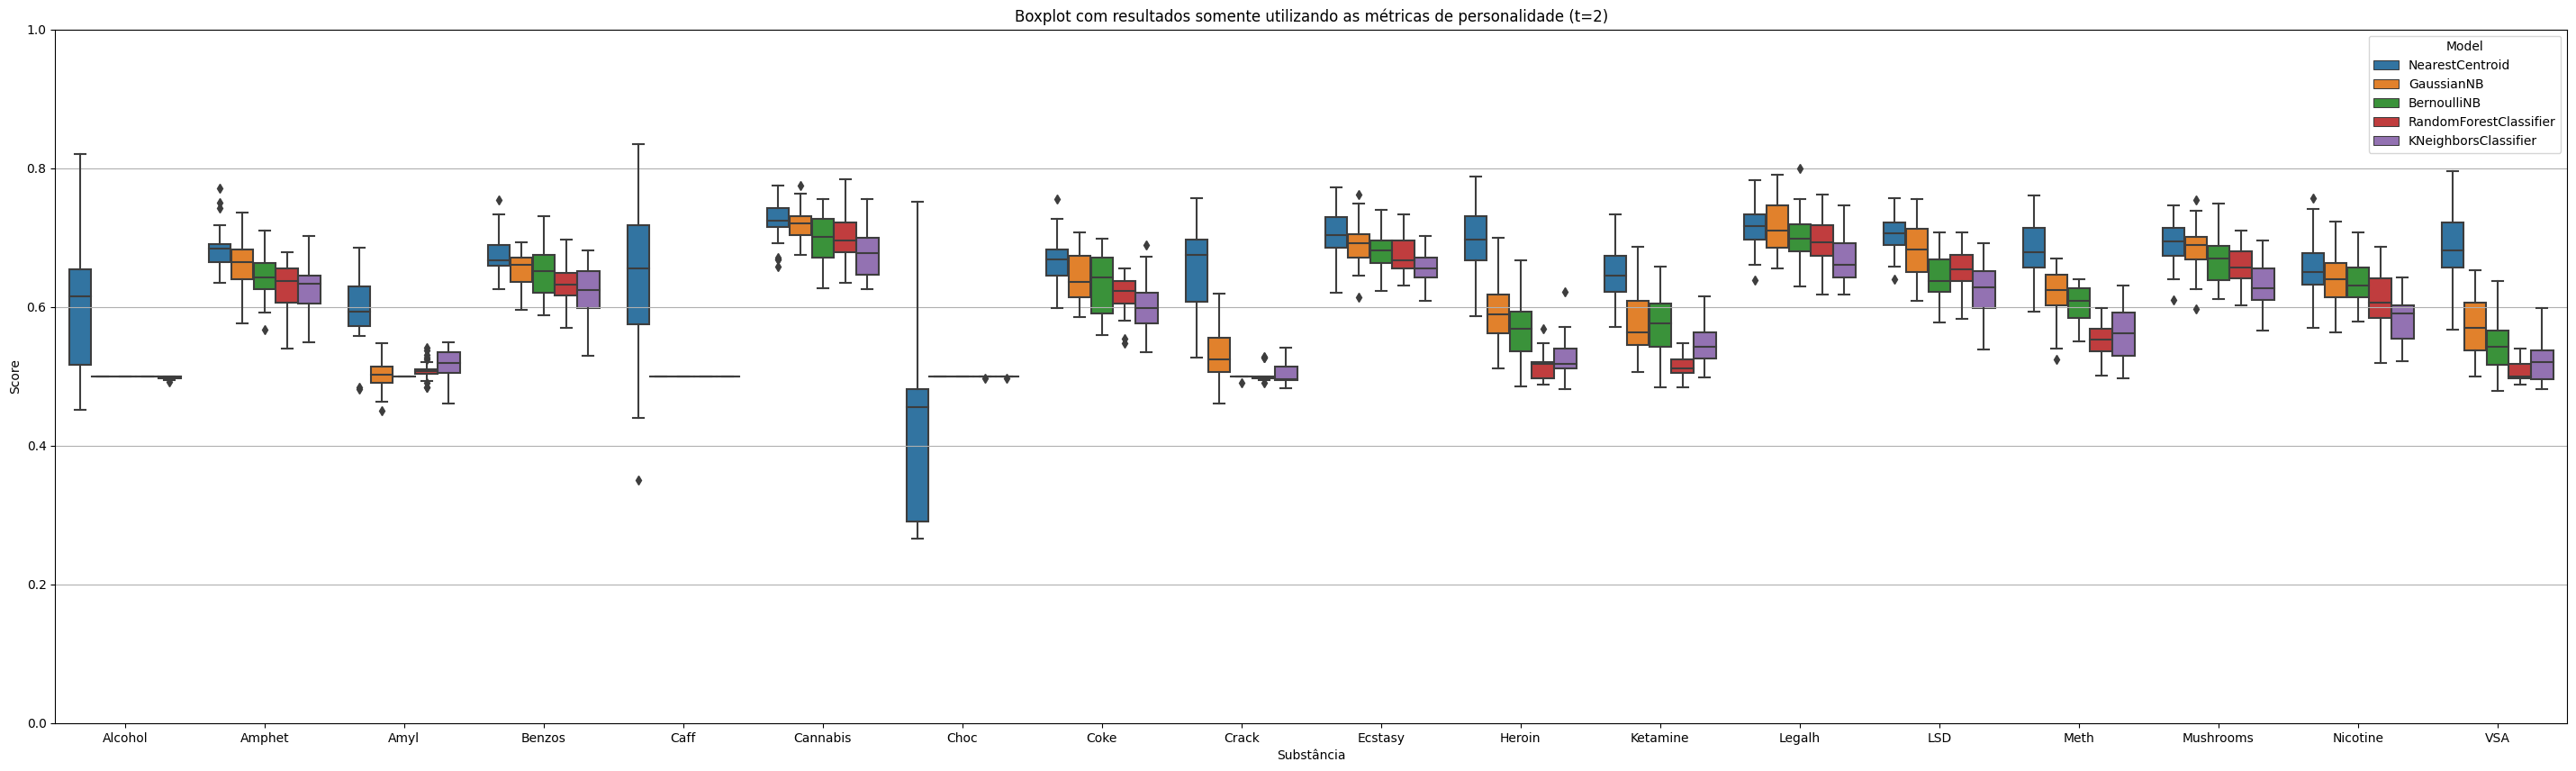

In [192]:
fig = ut.boxplot(results_metrics, title=f"Boxplot com resultados somente utilizando as métricas de personalidade (t={t})", lims=(0, 1), refs=None)
ut.show_statistics(results_metrics)

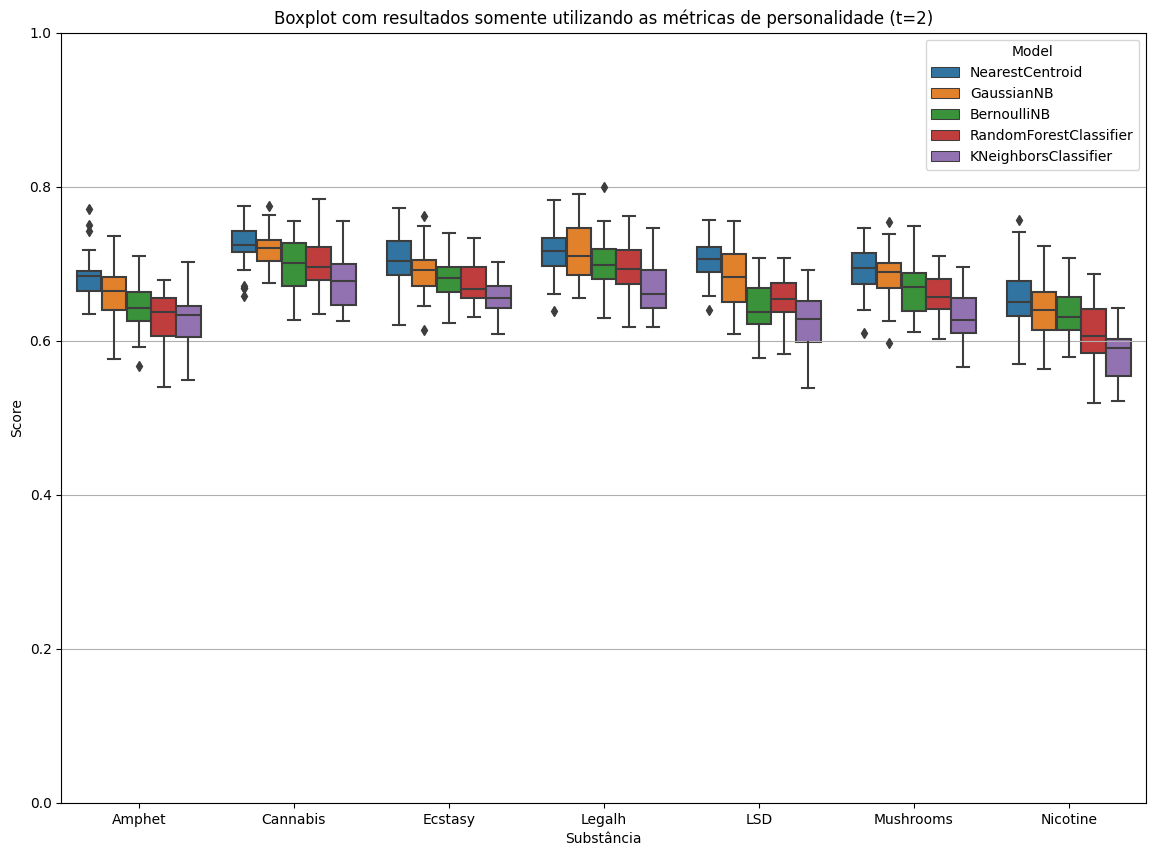

In [193]:
fig = ut.boxplot(
    results_metrics,
    title=f"Boxplot com resultados somente utilizando as métricas de personalidade (t={t})",
    substance_filter=ut.best_k,
)
fig.savefig("figures/metrics.svg")

#### Confusion Matrices

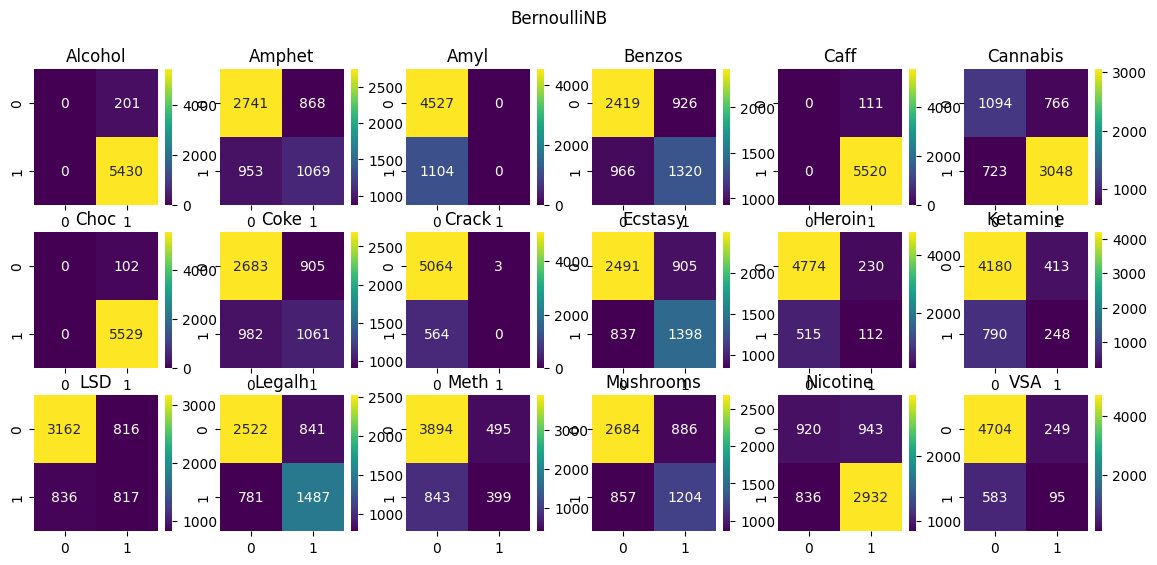

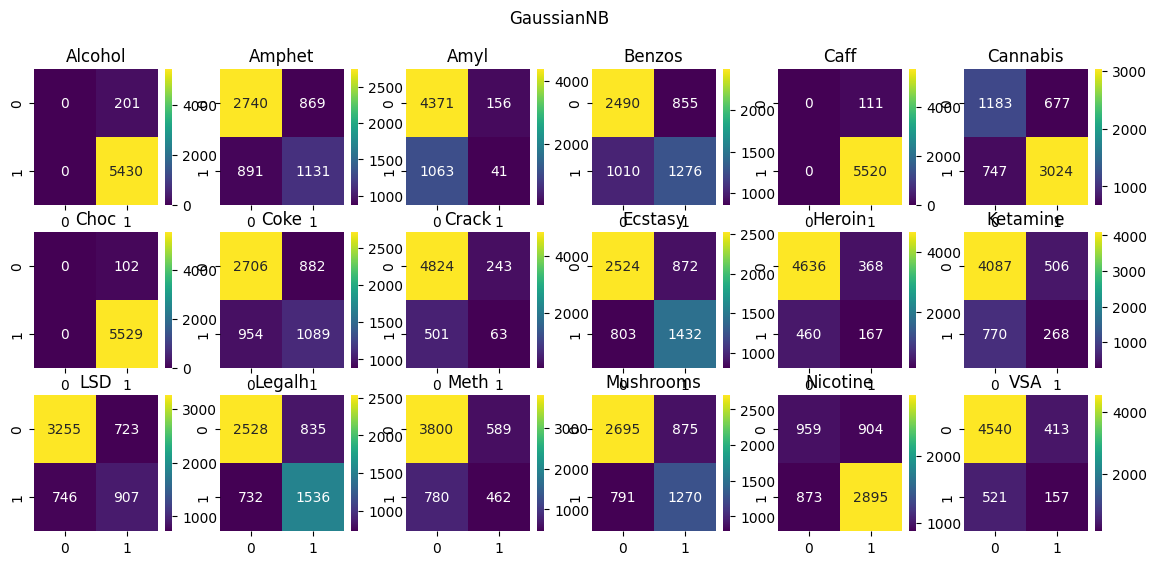

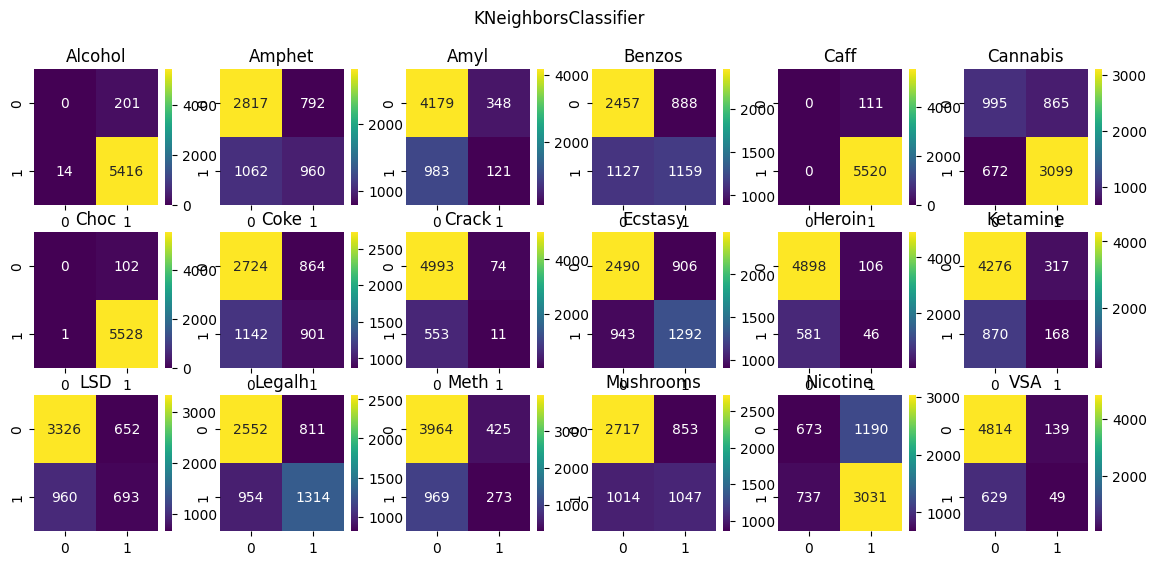

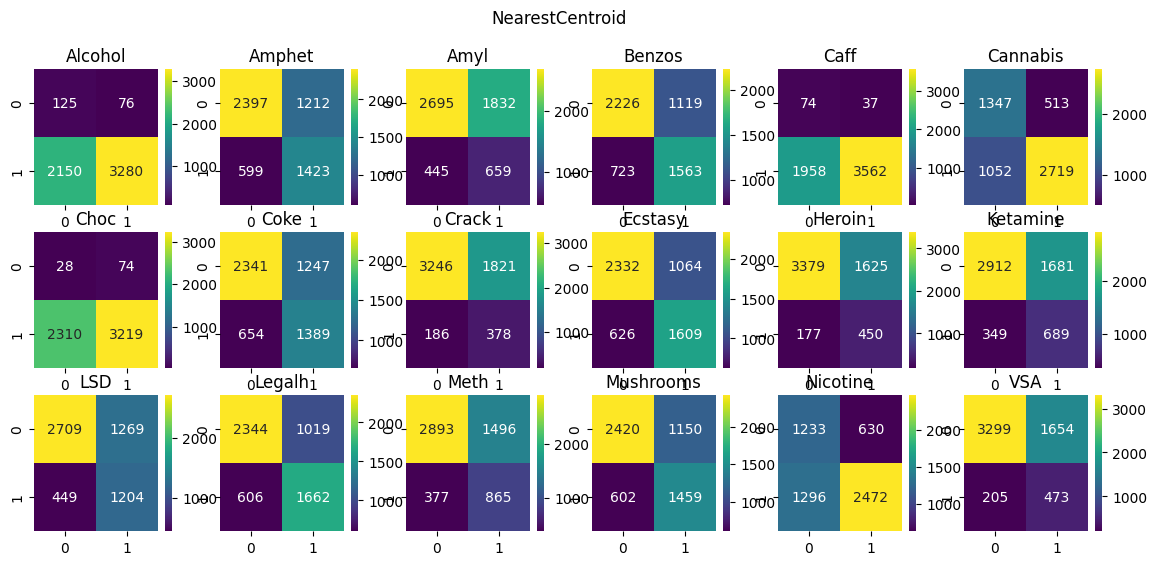

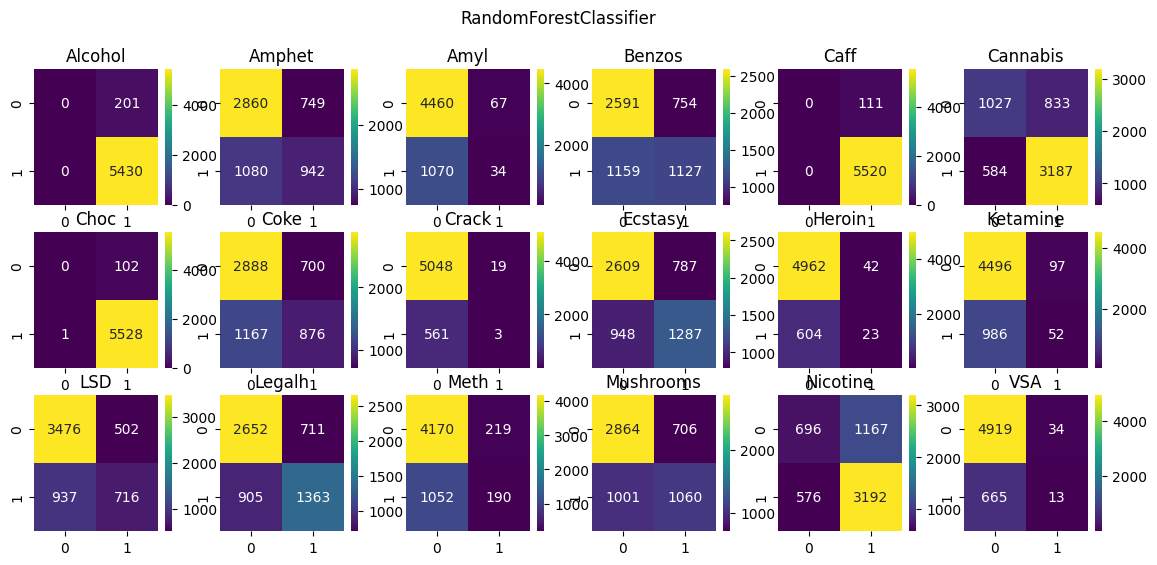

In [194]:
ut.confusion(cm_metrics)

### Análise em um range de idades
Tentamos classificar somente com dados de indívíduos entre 18 a 34 anos. Isso possibilitaria determinar um threshold menor de tempo de uso de uma substância (no último mês, por exemplo).

In [195]:
t = 3

def age_range_run():
    mask = X["Age"] < 2
    x_ = X[mask]
    labels = y[mask].applymap(ut.threshold, t=[t])
    return ut.test_classifiers(x_.drop(columns=["Age"]), labels)

results_age_range, cm_age_range = ut.run_or_load("results/age_range_{a}.csv", age_range_run if run else None)

/home/ngmonteiro/llm_experiments/ufes/2024-1-P1-Drug-Consumption/utils.py:316: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  for i, j in enumerate(t):


Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.500000  0.000000  0.671090  0.042551  0.500000   
GaussianNB              0.499688  0.001186  0.658094  0.043452  0.499835   
KNeighborsClassifier    0.499374  0.001623  0.606637  0.038538  0.506559   
NearestCentroid         0.557204  0.098177  0.683418  0.038333  0.589714   
RandomForestClassifier  0.500000  0.000000  0.588021  0.041921  0.502530   

Substância                          Benzos                Caff            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.000000  0.599270  0.037168  0.500000  0.000000   
GaussianNB              0.000904  0.617600  0.047635  0.497704  0.003132   
KNeighborsClassifier    0.017877  0.588786  0.041780  0.500000  0.000000   
NearestCentroid         0.062956  0.638415  0.035407  0.645060  0.150375   
RandomForestClassifier  0.011081  0.587863  0.040314  0.500000  0.000000   

Substância              Cannabis                Choc                Coke  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.741770  0.037559  0.500000  0.000000  0.584854   
GaussianNB              0.765553  0.046747  0.500000  0.000000  0.613554   
KNeighborsClassifier    0.738052  0.041856  0.500000  0.000000  0.580503   
NearestCentroid         0.747669  0.044678  0.391916  0.122654  0.637351   
RandomForestClassifier  0.744369  0.037670  0.499847  0.000837  0.591280   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.038863  0.522324  0.052856  0.657742  0.047658   
GaussianNB              0.053004  0.548080  0.055124  0.663372  0.037324   
KNeighborsClassifier    0.040395  0.496849  0.005011  0.609463  0.037597   
NearestCentroid         0.042359  0.691848  0.093888  0.659487  0.038812   
RandomForestClassifier  0.030118  0.504212  0.020042  0.619225  0.044816   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.518954  0.044469  0.518686  0.031344  0.653726   
GaussianNB              0.552579  0.055664  0.535905  0.049559  0.658864   
KNeighborsClassifier    0.515927  0.025599  0.522733  0.032504  0.595885   
NearestCentroid         0.682978  0.070150  0.619343  0.053004  0.678774   
RandomForestClassifier  0.510920  0.021666  0.502497  0.014279  0.605961   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.048472  0.705906  0.051031  0.584549  0.044221   
GaussianNB              0.047888  0.711040  0.039977  0.614116  0.047631   
KNeighborsClassifier    0.038561  0.663326  0.038068  0.577199  0.045962   
NearestCentroid         0.039341  0.703586  0.043771  0.658262  0.048333   
RandomForestClassifier  0.048221  0.689380  0.042421  0.560803  0.039010   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.663197  0.052460  0.670854  0.045146  0.499029   
GaussianNB              0.669967  0.043632

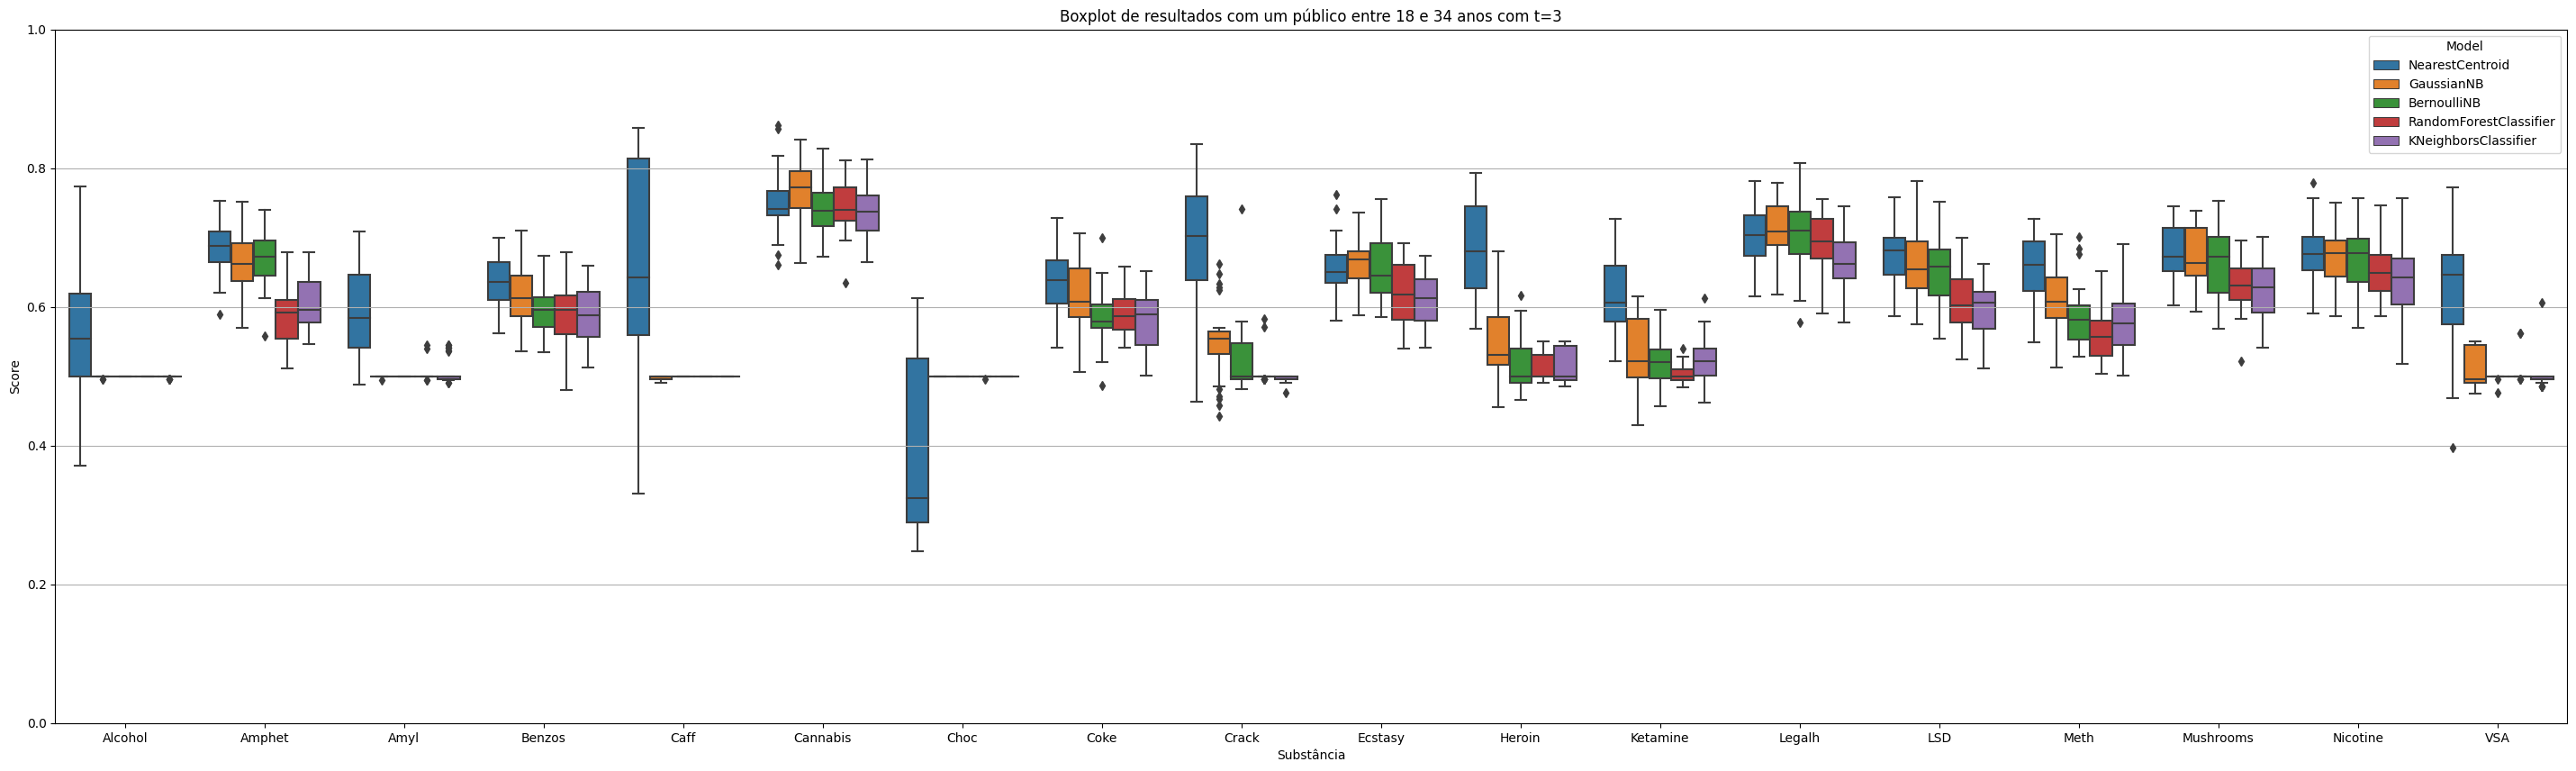

In [196]:
fig = ut.boxplot(results_age_range, title=f"Boxplot de resultados com um público entre 18 e 34 anos com t={t}", lims=(0, 1), refs=None)
ut.show_statistics(results_age_range)

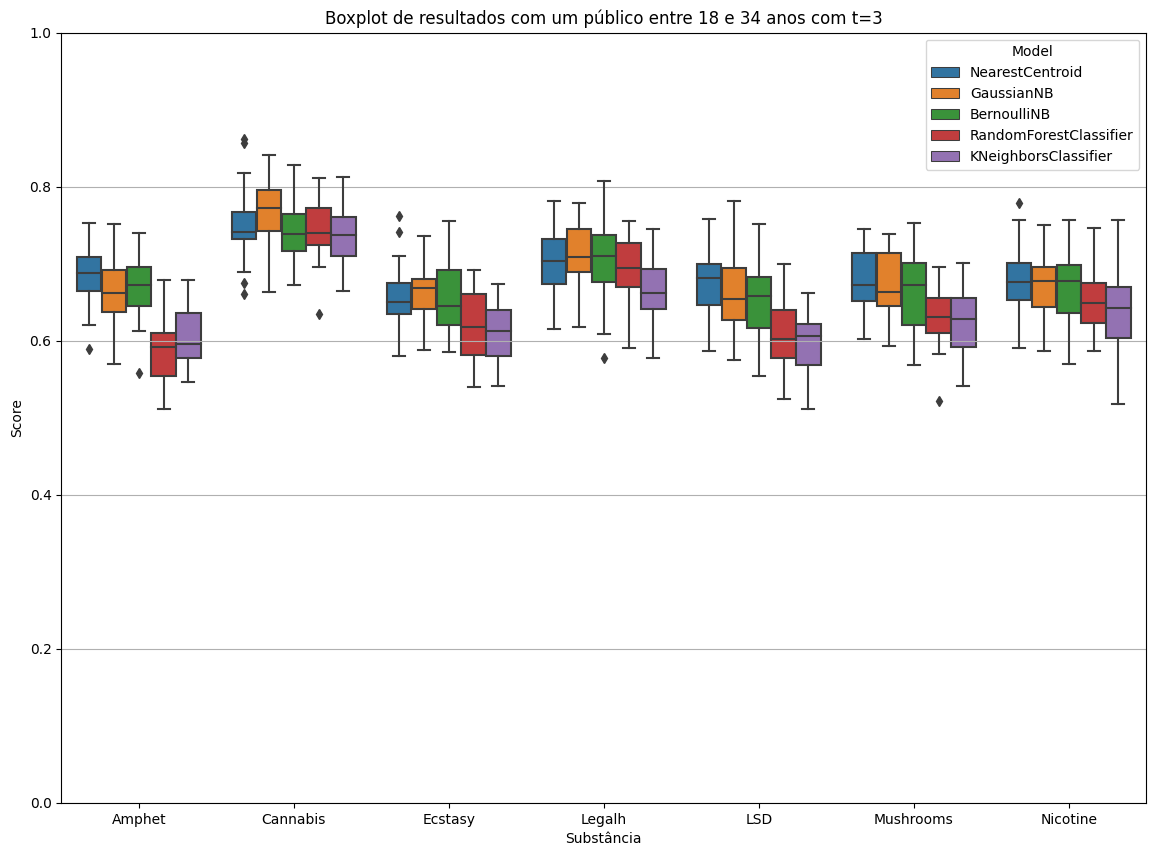

In [197]:
fig = ut.boxplot(
    results_age_range,
    title=f"Boxplot de resultados com um público entre 18 e 34 anos com t={t}",
    substance_filter=ut.best_k,
)
fig.savefig("figures/age_range.svg")

#### Confusion Matrices

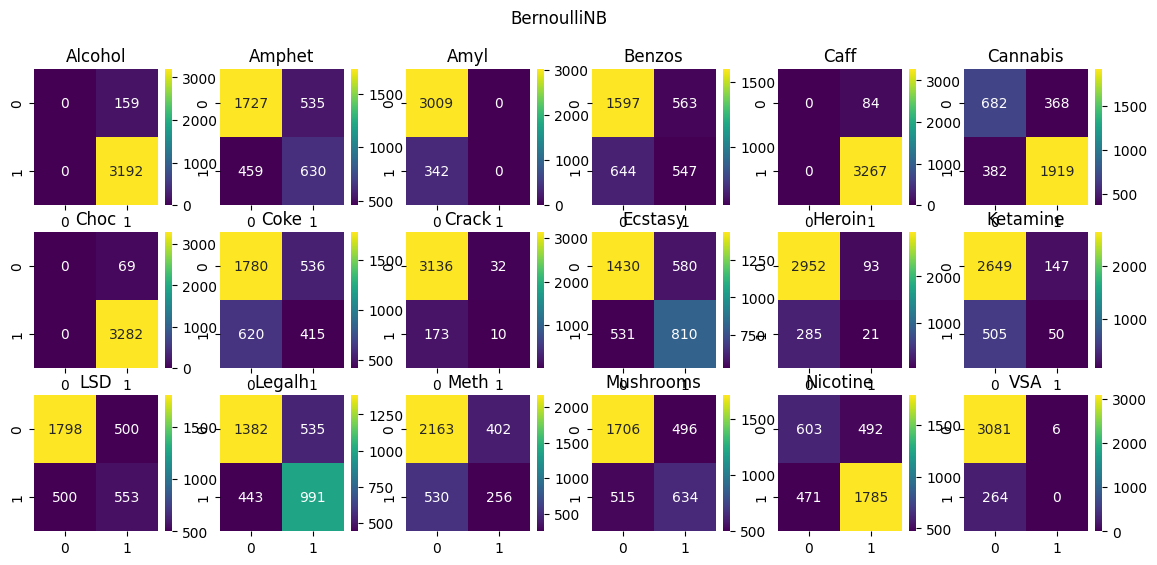

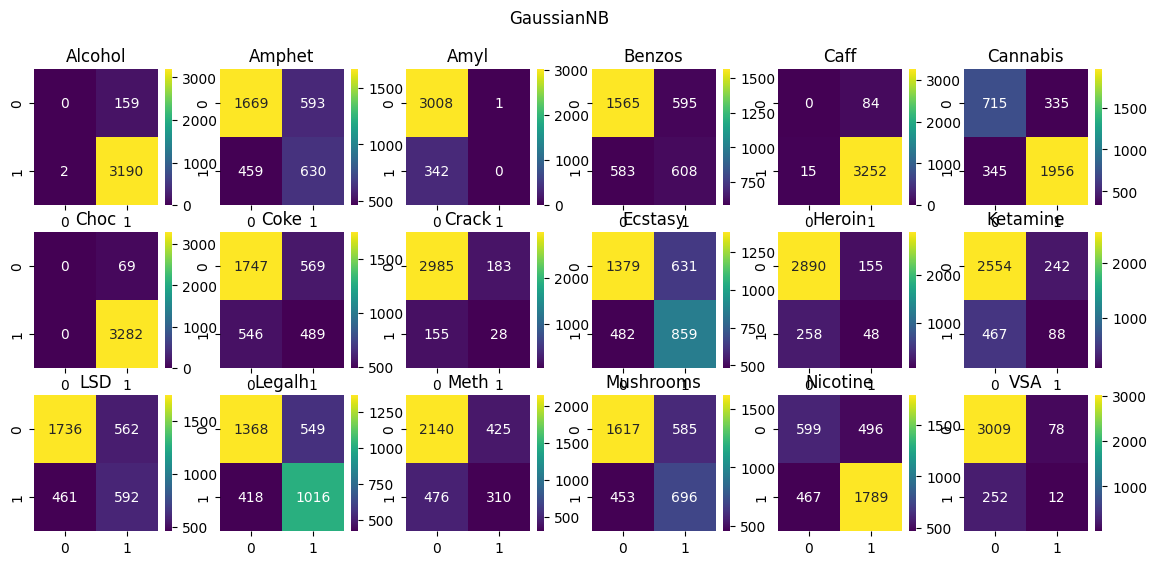

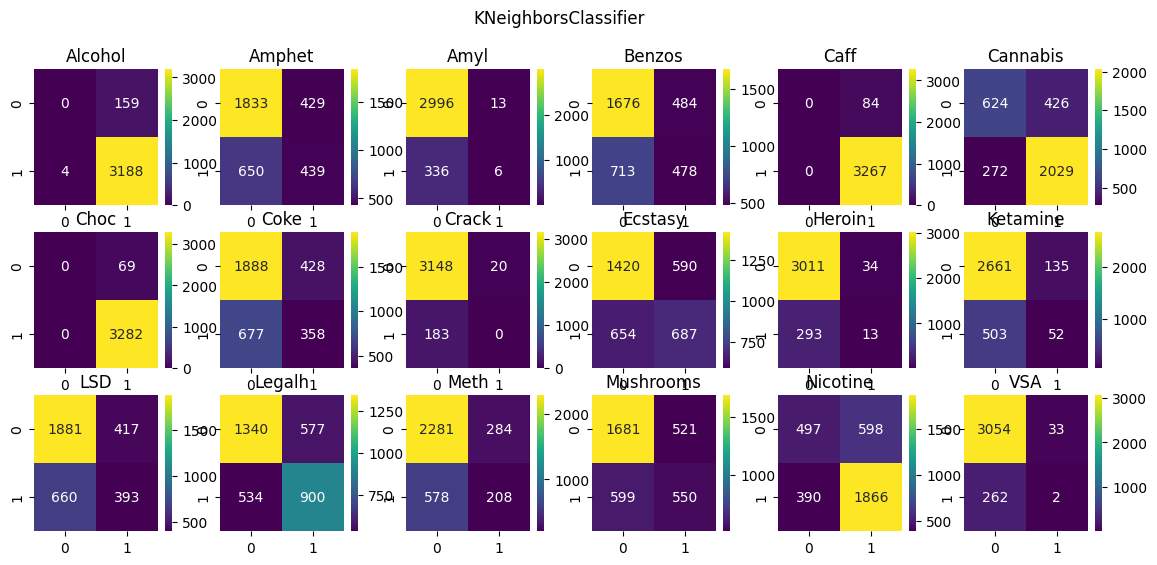

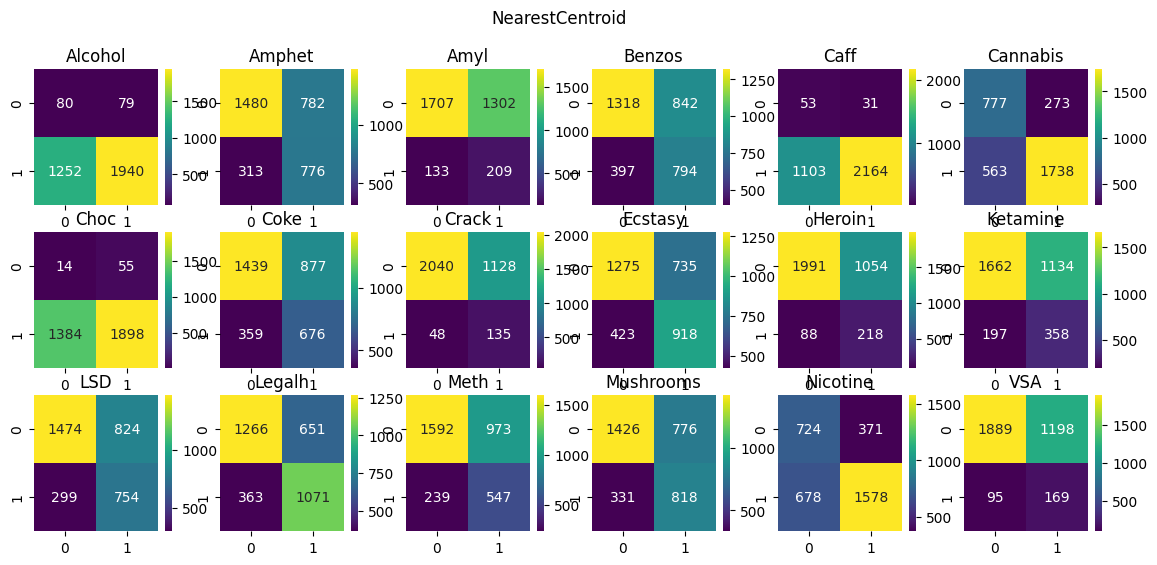

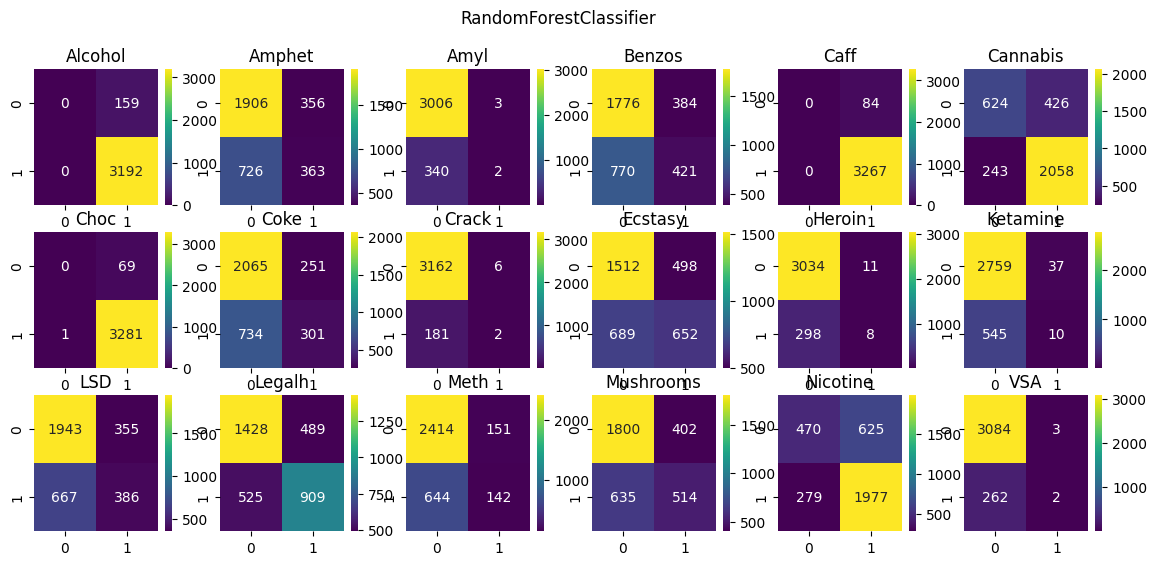

In [198]:
ut.confusion(cm_age_range)

### Análise com PCA
Tentamos aplicar algum tipo de redução de dimensionalidade para observar se há melhorias.

In [199]:
from sklearn.decomposition import PCA

t = 2
pca_comp = 0.95

def pca_run():
        labels = y.applymap(ut.threshold)
        return ut.test_classifiers(X, labels, pipe=(ut.metric_preprocessor(), PCA(n_components=pca_comp)))

results_pca, cm_pca = ut.run_or_load("results/pca_{a}.csv", pca_run if run else None)

/home/ngmonteiro/llm_experiments/ufes/2024-1-P1-Drug-Consumption/utils.py:316: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  for i, j in enumerate(t):


Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.500000  0.000000  0.661561  0.027975  0.500000   
GaussianNB              0.500000  0.000000  0.682654  0.032915  0.500374   
KNeighborsClassifier    0.499724  0.001112  0.641703  0.039517  0.536386   
NearestCentroid         0.629352  0.085431  0.705253  0.031509  0.617383   
RandomForestClassifier  0.500000  0.000000  0.679142  0.036768  0.506527   

Substância                          Benzos                Caff            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.000000  0.636656  0.029372  0.500000  0.000000   
GaussianNB              0.003076  0.653822  0.031598  0.500000  0.000000   
KNeighborsClassifier    0.040161  0.626427  0.031449  0.500000  0.000000   
NearestCentroid         0.035080  0.666984  0.031753  0.688436  0.134019   
RandomForestClassifier  0.009029  0.641701  0.034001  0.500000  0.000000   

Substância              Cannabis                Choc                Coke  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.735808  0.036838  0.500000  0.000000  0.644251   
GaussianNB              0.757679  0.025382  0.500000  0.000000  0.637189   
KNeighborsClassifier    0.728780  0.036547  0.499819  0.000689  0.635948   
NearestCentroid         0.771674  0.029998  0.503417  0.123605  0.678409   
RandomForestClassifier  0.741756  0.031066  0.500000  0.000000  0.637115   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.034266  0.500000  0.000000  0.713111  0.031848   
GaussianNB              0.034699  0.500285  0.005061  0.724348  0.039583   
KNeighborsClassifier    0.041436  0.508967  0.025960  0.682740  0.040389   
NearestCentroid         0.038263  0.652088  0.056525  0.737202  0.031380   
RandomForestClassifier  0.030495  0.502621  0.009294  0.704125  0.037876   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.500000  0.000000  0.500000  0.000000  0.640126   
GaussianNB              0.505517  0.012209  0.517032  0.018345  0.705834   
KNeighborsClassifier    0.534346  0.033846  0.549621  0.041845  0.665184   
NearestCentroid         0.696184  0.061012  0.672318  0.039052  0.746063   
RandomForestClassifier  0.511924  0.020297  0.515382  0.015672  0.667792   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.036907  0.736414  0.031823  0.504881  0.007459   
GaussianNB              0.031898  0.768041  0.026505  0.566388  0.029642   
KNeighborsClassifier    0.037199  0.749100  0.027391  0.591866  0.037145   
NearestCentroid         0.032242  0.779427  0.022427  0.691064  0.039572   
RandomForestClassifier  0.035739  0.765380  0.030685  0.562477  0.019382   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.696039  0.032113  0.605593  0.027827  0.500000   
GaussianNB              0.714472  0.034382

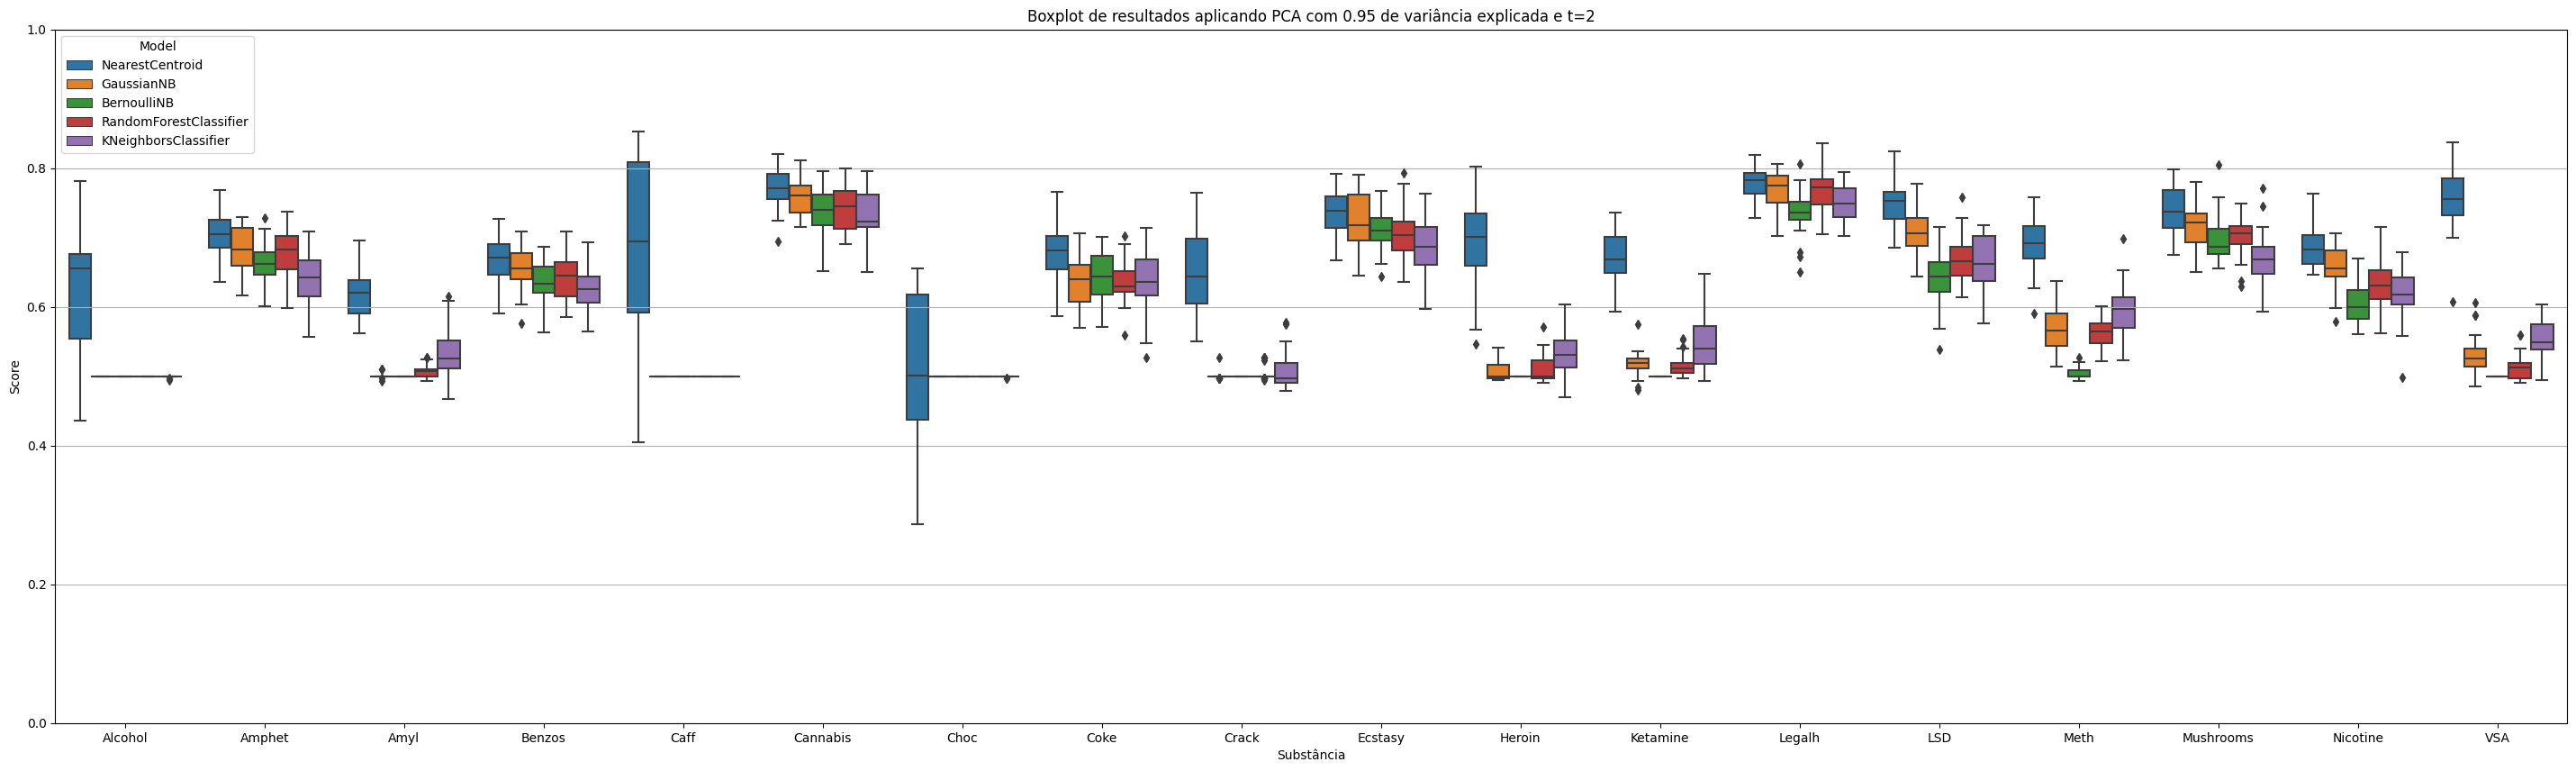

In [200]:
fig = ut.boxplot(results_pca, title=f"Boxplot de resultados aplicando PCA com {pca_comp} de variância explicada e t={t}")
ut.show_statistics(results_pca)

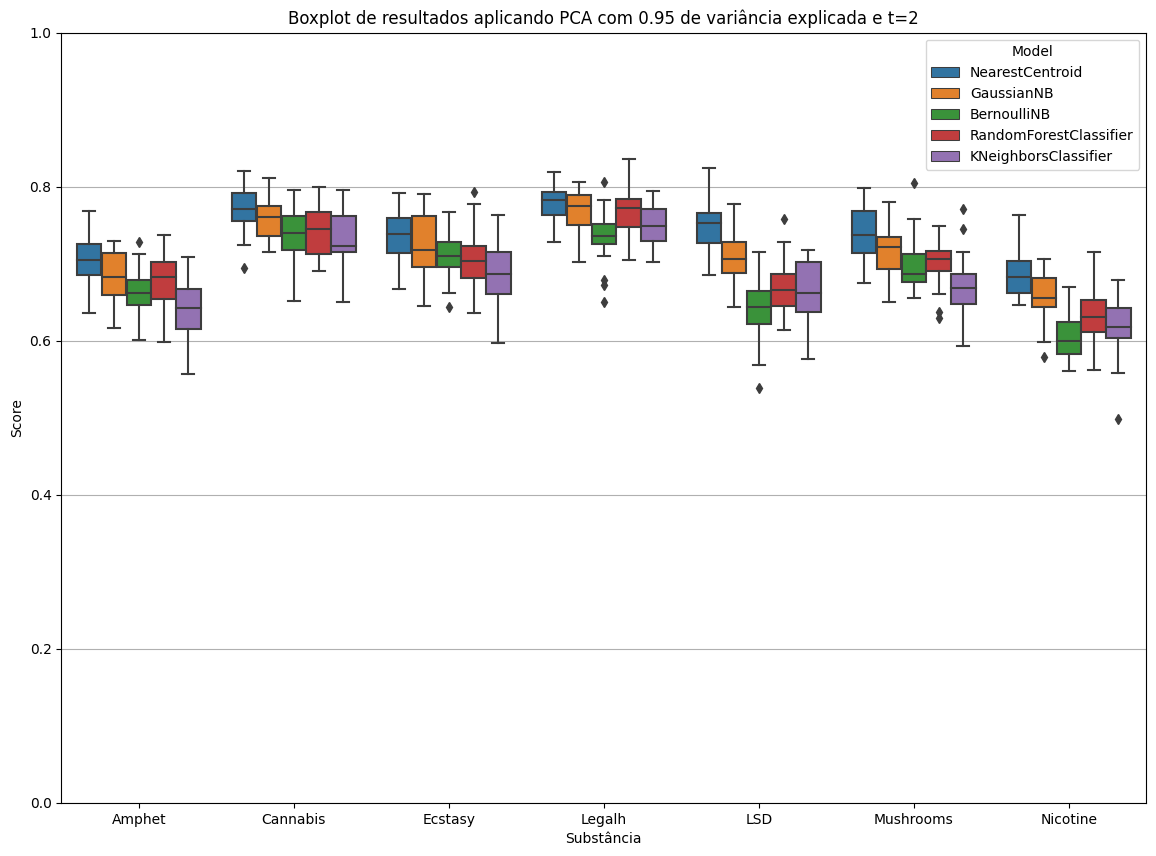

In [201]:
fig = ut.boxplot(
    results_pca,
    title=f"Boxplot de resultados aplicando PCA com {pca_comp} de variância explicada e t={t}",
    substance_filter=ut.best_k,
)
fig.savefig("figures/pca.svg")

#### Confusion Matrices

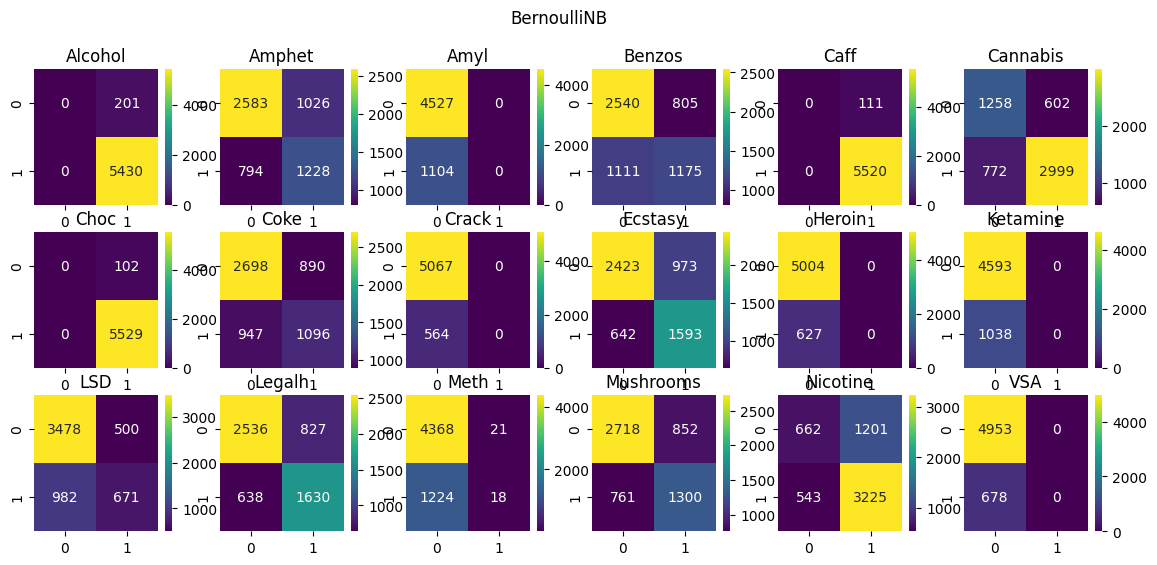

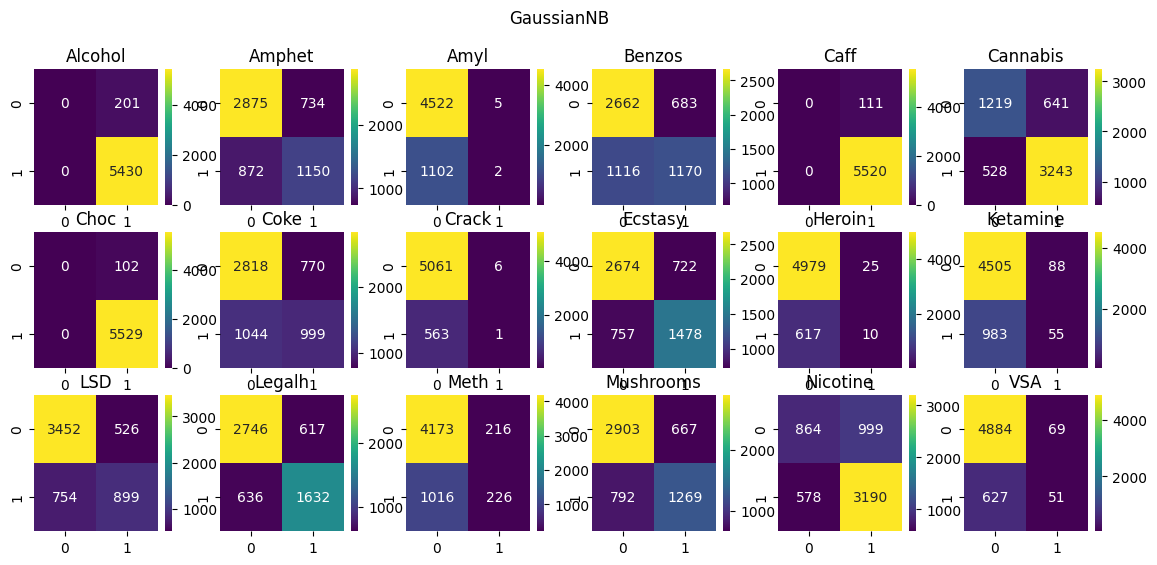

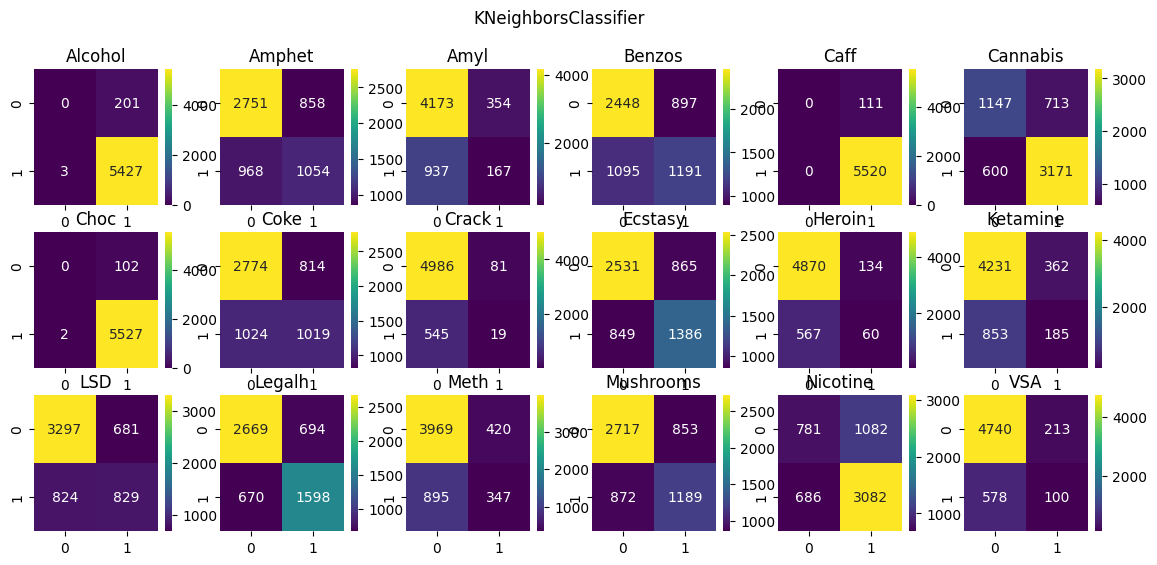

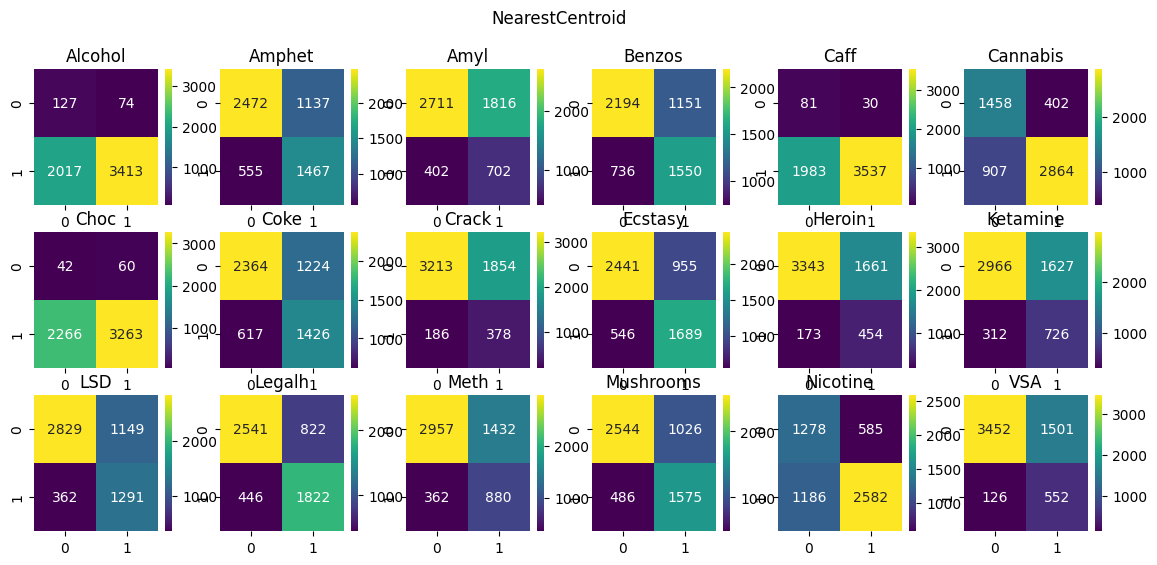

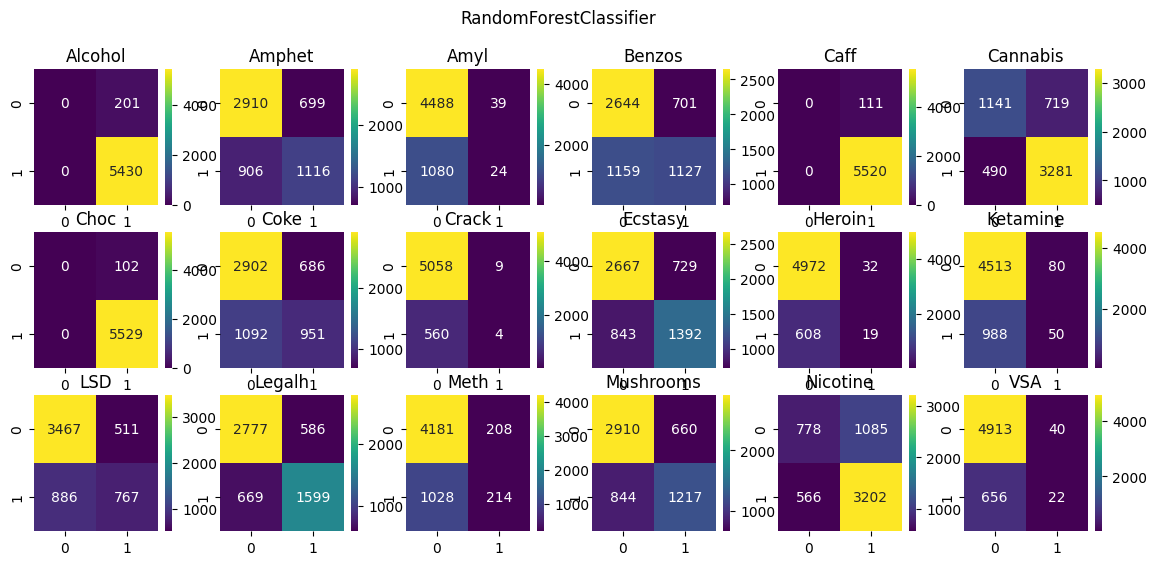

In [202]:
ut.confusion(cm_pca)

## Tratando como Multiclasse
Ao invés de tentar detectar somente dentro de um período de tempo, podemos separar em blocos maiores, de forma que possamos interpretar melhor os resultados.

Ex.: se separarmos entre década, ano e mês, podemos saber separar pessoas que
 - nunca usaram ou experimentaram pouco;
 - pararam de usar recentemente;
 - continuam usando.

In [203]:
t = [2, 4]

def multiclass_run():
    labels = y.applymap(ut.threshold, t=[2, 4])
    return ut.test_classifiers(X, labels)

results_multiclass, cm_multiclass = ut.run_or_load("results/multiclass_{a}.csv", multiclass_run if run else None)

/home/ngmonteiro/llm_experiments/ufes/2024-1-P1-Drug-Consumption/utils.py:316: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  for i, j in enumerate(t):


Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.333333  0.000000  0.445424  0.033896  0.339081   
GaussianNB              0.337157  0.018700  0.480689  0.041182  0.357878   
KNeighborsClassifier    0.336419  0.019830  0.409848  0.028391  0.349795   
NearestCentroid         0.467323  0.071093  0.510996  0.050941  0.477956   
RandomForestClassifier  0.334268  0.005345  0.406913  0.030019  0.342268   

Substância                          Benzos                Caff            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.011880  0.435513  0.034631  0.333333  0.000000   
GaussianNB              0.035140  0.455888  0.033931  0.332700  0.001441   
KNeighborsClassifier    0.022026  0.403357  0.020894  0.338067  0.021130   
NearestCentroid         0.091525  0.483355  0.038146  0.478628  0.082613   
RandomForestClassifier  0.011139  0.406236  0.029342  0.333207  0.000481   

Substância              Cannabis                Choc                Coke  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.561755  0.027037  0.333333  0.000000  0.418729   
GaussianNB              0.568502  0.028876  0.333333  0.000000  0.433411   
KNeighborsClassifier    0.557186  0.032401  0.332772  0.001002  0.387352   
NearestCentroid         0.587471  0.041591  0.302698  0.097269  0.512500   
RandomForestClassifier  0.573826  0.033971  0.333333  0.000000  0.392851   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.028162  0.363766  0.023740  0.485998  0.030884   
GaussianNB              0.023270  0.364310  0.028611  0.511113  0.031664   
KNeighborsClassifier    0.031264  0.338388  0.015308  0.428927  0.023229   
NearestCentroid         0.045284  0.477992  0.130842  0.538102  0.034270   
RandomForestClassifier  0.019184  0.335289  0.006752  0.455389  0.030199   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.372283  0.040680  0.372185  0.025250  0.470799   
GaussianNB              0.430417  0.063174  0.397014  0.040183  0.509530   
KNeighborsClassifier    0.346858  0.019928  0.365008  0.026786  0.417661   
NearestCentroid         0.532635  0.068957  0.498230  0.046180  0.539437   
RandomForestClassifier  0.340220  0.012120  0.349214  0.019132  0.423307   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.042167  0.504676  0.030312  0.392756  0.028017   
GaussianNB              0.042367  0.533250  0.036197  0.445787  0.048560   
KNeighborsClassifier    0.022480  0.471015  0.025612  0.389738  0.030782   
NearestCentroid         0.051654  0.566128  0.039741  0.469002  0.046980   
RandomForestClassifier  0.036007  0.491457  0.030390  0.358307  0.021725   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.448423  0.035115  0.467019  0.018479  0.415920   
GaussianNB              0.486715  0.034514

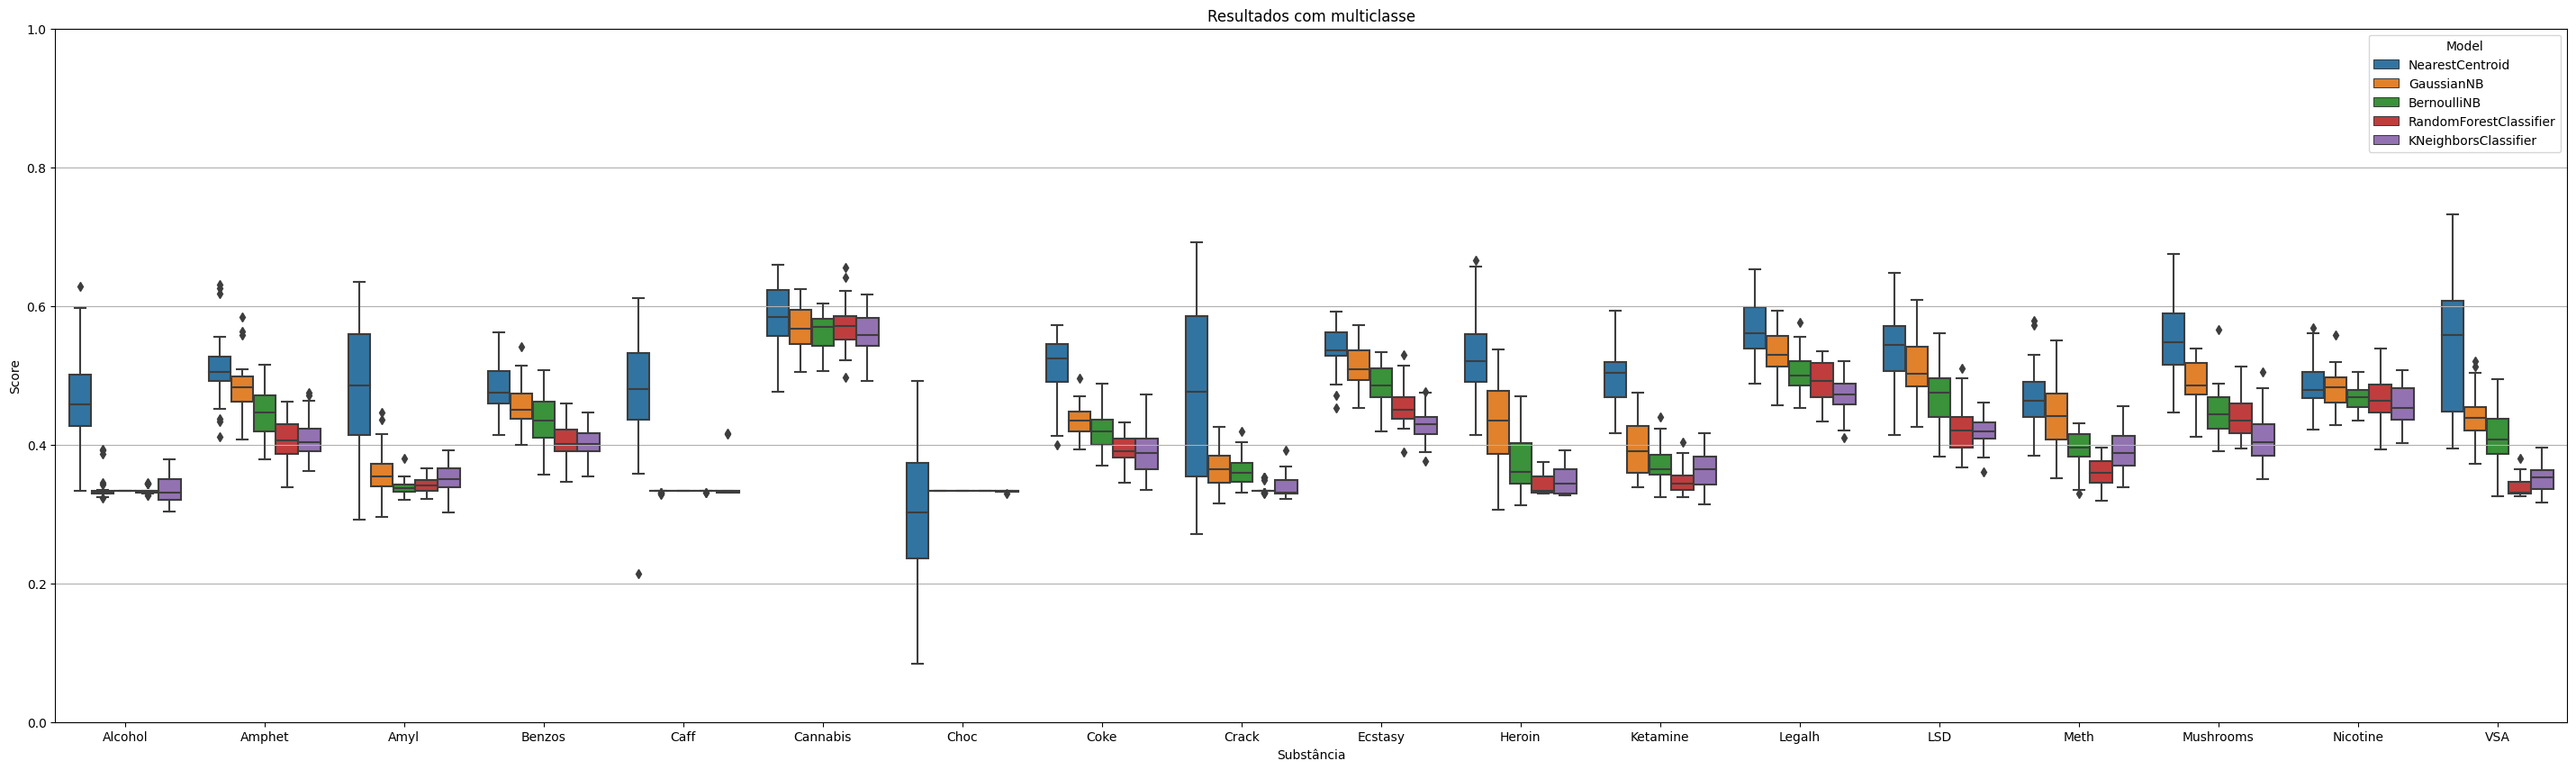

In [204]:
fig = ut.boxplot(results_multiclass, f"Resultados com multiclasse")
ut.show_statistics(results_multiclass)

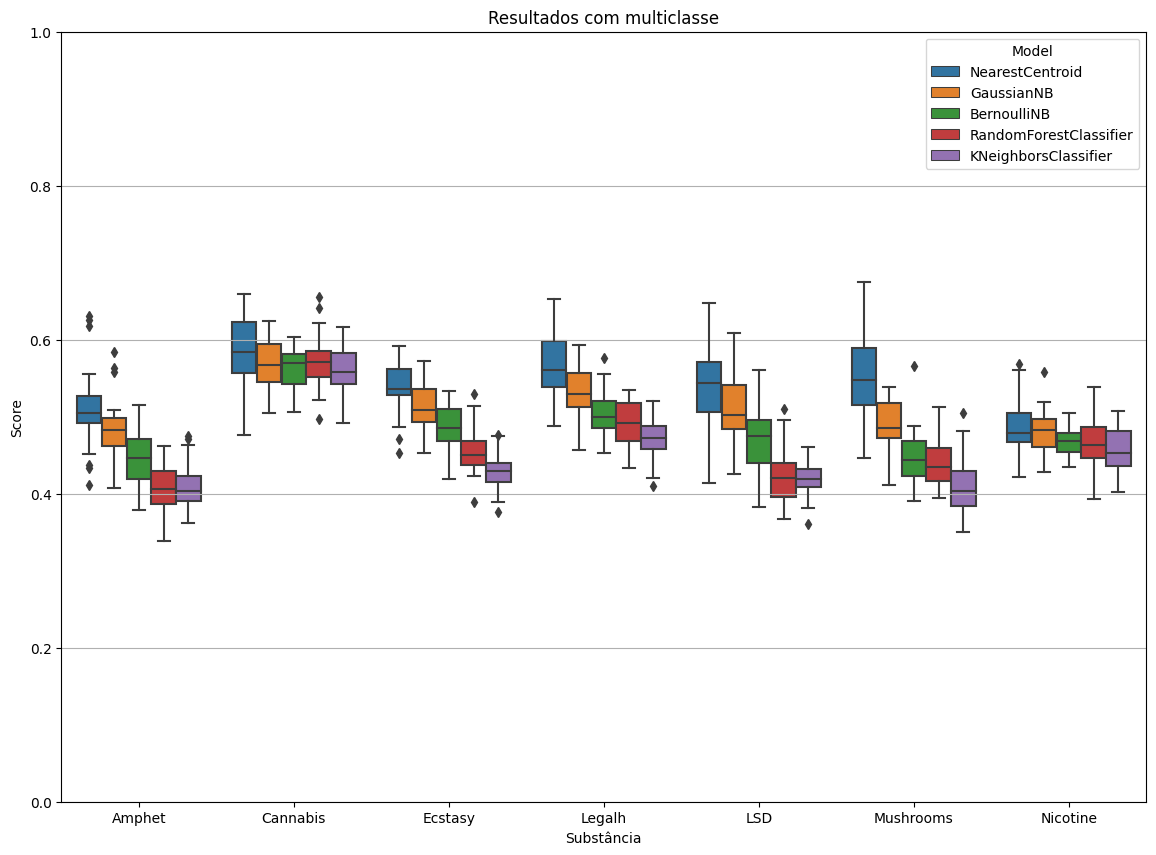

In [205]:
fig = ut.boxplot(
    results_multiclass,
    f"Resultados com multiclasse",
    substance_filter=ut.best_k,
)
fig.savefig("figures/multiclass.svg")

### Confusion Matrices

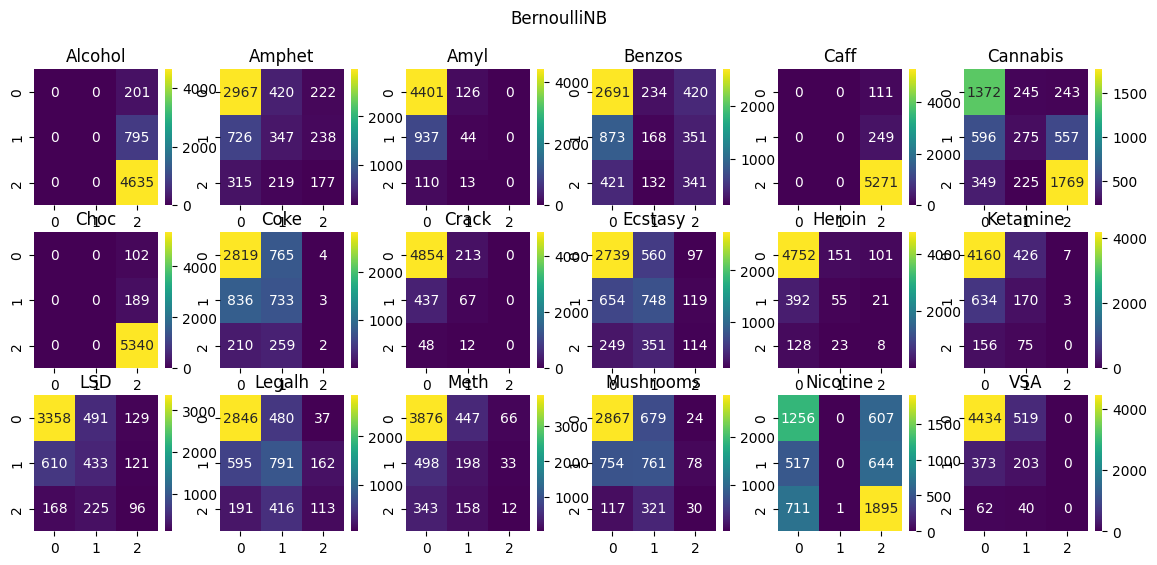

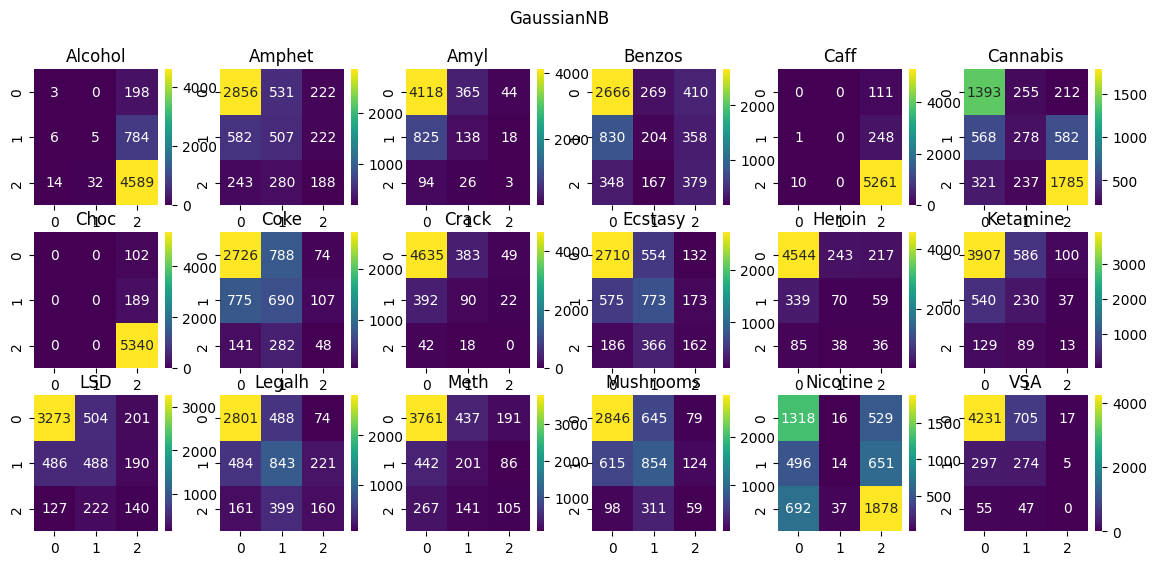

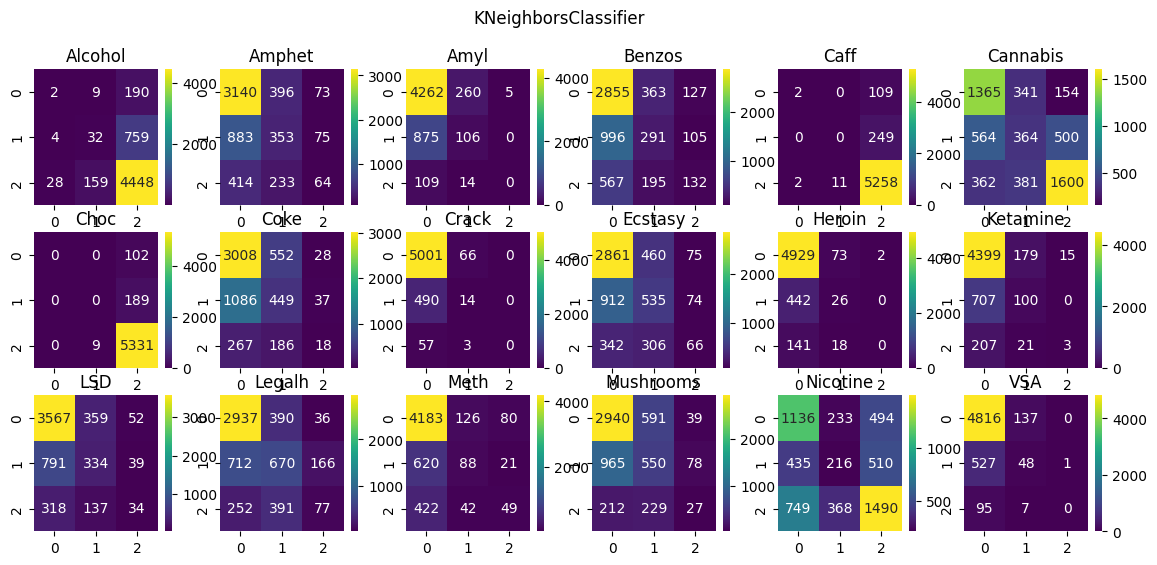

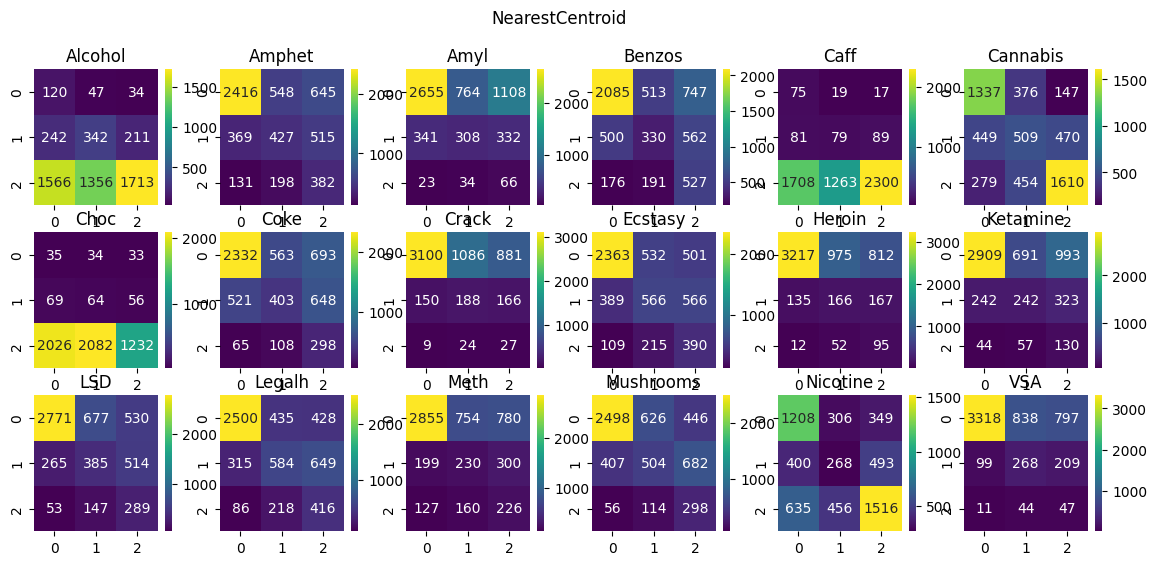

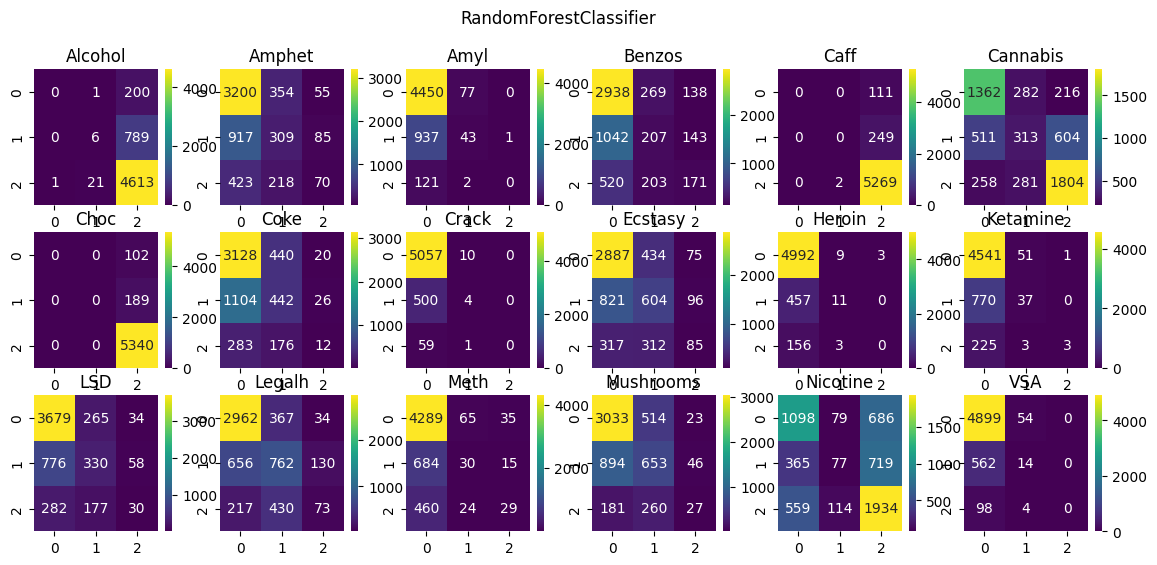

In [206]:
ut.confusion(cm_multiclass)